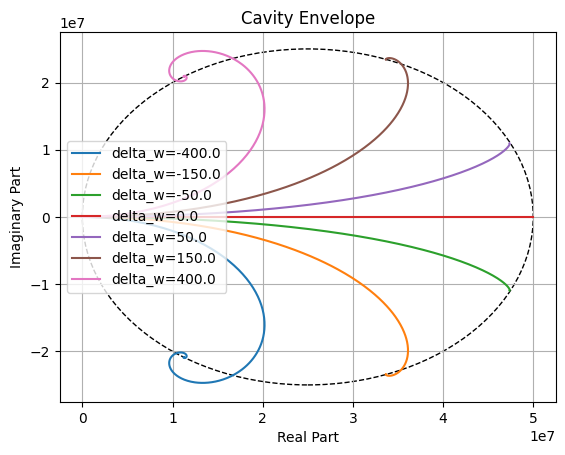

In [1]:
"""
Program Name: VirtualCavityEnvelopeGraph
Author: Liu Ming
Contact: ming-1018@foxmail.com
Version: 1.0
Created Date: 2023/10/18 下午3:35

Copyright (c) 2023 Liu Ming. All rights reserved.

Description: ...

Usage: Run the program and ...

Dependencies:
- Python 3.8 or above

Modifications:
- 2023/10/18 下午3:35: Initial Create.

"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def v(t, w_half, delta_w):
    i0 = 32e-3
    RL = 1560e6
    numerator = i0 * w_half * RL * (np.exp((-w_half + 1j * delta_w) * t) - 1)
    denominator = -w_half + 1j * delta_w
    return numerator / denominator

t = np.linspace(0, 0.01, 1000)  # 定义时间范围和点数
delta_w_values = [-400 * 2 * np.pi, -150 * 2 * np.pi, -50 * 2 * np.pi, 0 * 2 * np.pi, 50 * 2 * np.pi, 150 * 2 * np.pi, 400 * 2 * np.pi]  # 不同频率差的值

plt.figure()  # 创建新的图形窗口

for delta_w in delta_w_values:
    v_t = v(t, 216 * 2 * np.pi, delta_w)  # 计算函数值

    I = np.real(v_t)  # 提取实部
    Q = np.imag(v_t)  # 提取虚部

    plt.plot(I, Q, label=f'delta_w={delta_w/(2*np.pi)}')  # 绘制实部为横轴，虚部为纵轴的曲线

# 绘制虚线的圆
circle = Circle((2.5e7, 0), radius=2.5e7, linestyle='dashed', edgecolor='black', facecolor='none')
plt.gca().add_patch(circle)

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Cavity Envelope')
plt.grid(True)
plt.legend()
plt.show()


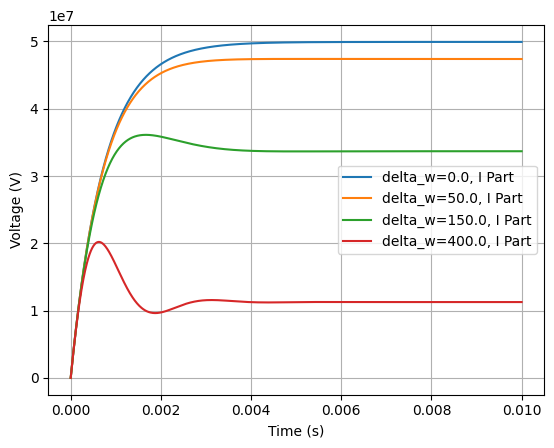

In [5]:
"""
Program Name: VirtualCavityVoltageEnvelope
Author: Liu Ming
Contact: ming-1018@foxmail.com
Version: 1.0
Created Date: 2023/10/18 下午3:12

Copyright (c) 2023 Liu Ming. All rights reserved.

Description: Plot Virtual Cavity Voltage Envelope.

Usage: Run the program and ...

Dependencies:
- Python 3.8 or above
- Numpy library(Version 1.23.5 or above)

Modifications:
- 2023/10/18 下午3:12: Initial Create.

"""

import numpy as np
import matplotlib.pyplot as plt

def v(t, delta_w):
    i0 = 32e-3
    RL = 1560e6
    w_half = 216 * 2 * np.pi
    numerator = i0 * w_half * RL * (np.exp((-w_half + 1j * delta_w) * t) - 1)
    denominator = -w_half + 1j * delta_w
    return numerator / denominator

t = np.linspace(0, 0.01, 1000)  # 定义时间范围和点数
# delta_w_values = [-400 * 2 * np.pi, -150 * 2 * np.pi, -50 * 2 * np.pi, 0 * 2 * np.pi, 50 * 2 * np.pi, 150 * 2 * np.pi, 400 * 2 * np.pi]  # 不同频率差的值
delta_w_values = [0 * 2 * np.pi, 50 * 2 * np.pi, 150 * 2 * np.pi, 400 * 2 * np.pi]  # 不同频率差的值

plt.figure()  # 创建新的图形窗口

for delta_w in delta_w_values:
    v_t = v(t, delta_w)  # 计算函数值

    I = np.real(v_t)  # 提取实部
    Q = np.imag(v_t)  # 提取虚部

    plt.plot(t, I, label=f'delta_w={delta_w/(2*np.pi)}, I Part')  # 绘制实部曲线
    plt.plot(t, Q, label=f'delta_w={delta_w/(2*np.pi)}, Q Part')  # 绘制虚部曲线

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('')
plt.legend()
plt.grid(True)
plt.show()


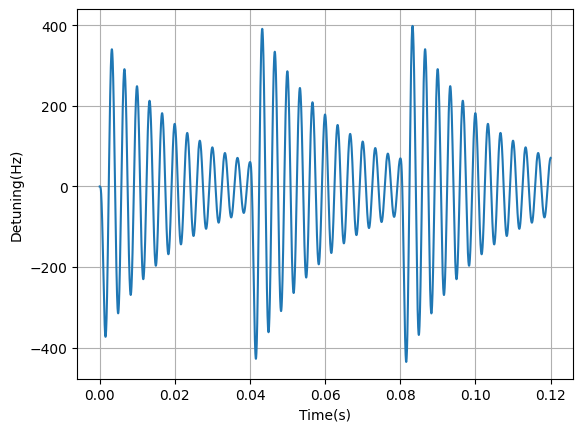

In [2]:
"""
Program Name: CavityVaryingDetuning
Author: Liu Ming
Contact: ming-1018@foxmail.com
Version: 1.0
Created Date: 2023/10/19 下午6:20

Copyright (c) 2023 Liu Ming. All rights reserved.

Description: ...

Usage: Run the program and ...

Dependencies:
- Python 3.8 or above

Modifications:
- 2023/10/19 下午6:20: Initial Create.

"""

import numpy as np
import matplotlib.pyplot as plt

f_m = np.array([335, 490, 750])
Q_m = np.array([100, 70, 50])
K_m = np.array([0.4, 0.3, 0.2])
omega_0 = 0
t = np.linspace(0, 0.12, 1000000)

def voltage_function(t):
    t = t % 0.04
    return 14 * ((t < 0.0004) * 1.47 * (1 - np.exp(-t / 0.00032)) + ((t >= 0.0004) & (t <= 0.001)) * 1 + (t > 0.001) * np.exp(-(t - 0.001) / 0.000497))

def calculate_discrepancy(t, V):
    omega_m = np.zeros((2, len(t)))
    for i in range(3):
        A_m = np.array([[0, 1], [-2 * np.pi * f_m[i]**2, -2 * np.pi * f_m[i] / Q_m[i]]])
        B_m = np.array([0, -(2 * np.pi * f_m[i])**2 * K_m[i]])
        omega_m[:, 0] = np.array([0, 0])
        for j in range(len(t) - 1):
            dt = t[j + 1] - t[j]
            domega_m = A_m.dot(omega_m[:, j]) + B_m * V[j]**2
            omega_m[:, j + 1] = omega_m[:, j] + domega_m * dt
    return omega_m[0, :]

V = voltage_function(t)
omega_m = calculate_discrepancy(t, V)

plt.plot(t, omega_m)
plt.xlabel('Time(s)')
plt.ylabel('Detuning(Hz)')
plt.title('')
plt.grid(True)
plt.show()
